**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [2]:
#implement elbow method from scratch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def euclid(pa, pb):
  dist = 0
  for (p,q) in zip(pa, pb):
    dist += float((float(p)-float(q))**2)
  return dist**(1/2)
  
def manhattan(pa, pb):
  dist = 0
  for (p,q) in zip(pa, pb):
    dist += abs(p-q)
  return dist

def getSquaredDist(clusters, centers):
  dist = 0
  for i in range(0, len(clusters)):
    for samp in clusters[i]:
      dist += euclid(samp, centers[i])**2
    return dist

def plotClusters(data, labels):
  colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
  X = TSNE(n_components=2, init='pca').fit_transform(data)
  plt.scatter(X[:,0], X[:,1], c=colors[labels])
  plt.show()

def elbow(data, initialisation, dist):
    Sumsqd = []
    K = 5
    xk = range(2, K+1)
    for i in range(2, K+1) :
        model = Kmeans(i)
        model.clustering(data, initialisation, dist)
        centers = model.centers
        clusters = model.centGroup
        Sumsqd.append(getSquaredDist(clusters, centers)) #getSquareddist method is implemented in Kmeans class
        plotClusters(data, model.labels)
    plt.plot(xk,Sumsqd, 'bx-')
    plt.xlabel('K') 
    plt.ylabel('Sum of squared distances') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [3]:
#implement silhouette method from scratch
def getSill(clusters, centers, data):
  sill = []
  a = 0
  for samp in data:
    a = 0
    for samp1 in data:
      a+= euclid(samp, samp1)
    a = a/len(data)
    b = 0
    mini = 1e15
    for i in range(0, len(clusters)):
      dis = euclid(samp, centers[i])
      if mini > dis:
        mini = dis 
      b += dis
    b -= mini
    b = b/(len(centers)-1)
    sill.append((b-a)/ max(a, b))
  return np.mean(sill)

def silhouette(data, initialisation, dist):
    SillIndex = []
    K = 5
    xk = range(2, K+1)
    for i in range(2, K+1) :
        model = Kmeans(i)
        model.clustering(data, initialisation, dist)
        centers = model.centers
        clusters = model.centGroup
        SillIndex.append(getSill(clusters, centers, data)) #getSill method is implemented in Kmeans class
    plt.plot(xk,SillIndex, 'bx-')
    plt.xlabel('K') 
    plt.ylabel('silhouette coefficient') 
    plt.title('silohouette For Optimal k')
    plt.show()


In [4]:
#implement Kmeans from scratch
class Kmeans:
  def __init__(self, k):
    self.k = k
    self.iter = 50
    self.centers = []
    self.centGroup = []
    self.labels = []
  
  def clustering(self, data, initialisation, dist):
    self.centers = []
    if initialisation == "random":
        indices = np.random.choice(range(0, self.k), replace = True, size = data.shape[0])
        mean = []
        for count in range(self.k):
            mean.append(data[indices == count].mean(axis=0))
            
        self.centers = np.concatenate([val[ None, :] for val in mean], axis = 0)
    else: #for forgy
      a = range(0, len(data))
      indices = np.random.choice(a, replace = False, size = self.k)
      for i in indices:
        self.centers.append(data[i])
    # for i in range(0, self.k):
    #   self.centers.append(data[i])
    self.centGroup = []
    for i in range(self.iter):
      self.centGroup = []
      self.labels = []
      for i in range(0, self.k):
        self.centGroup.append([])
      for samp in data:
        if dist == "euclid":
          dists = [euclid(samp, x) for x in self.centers]
        else:
          dists = [manhattan(samp, x) for x in self.centers]
        group  = dists.index(min(dists))
        self.centGroup[group].append(samp)
        self.labels.append(group)

      for i in range(0, self.k):
        self.centers[i] = np.average(self.centGroup[i], axis=0)
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


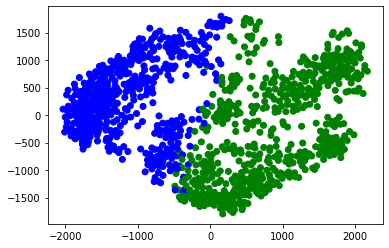

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


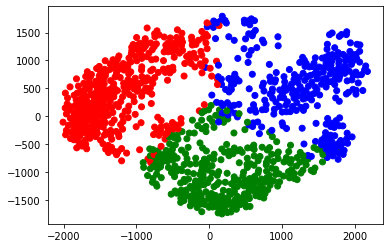

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


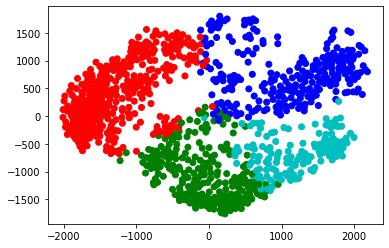

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


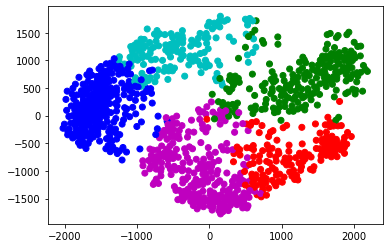

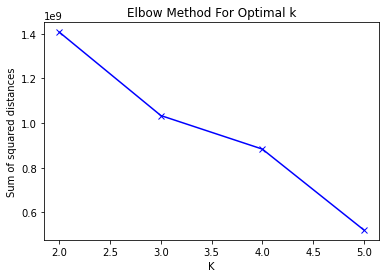

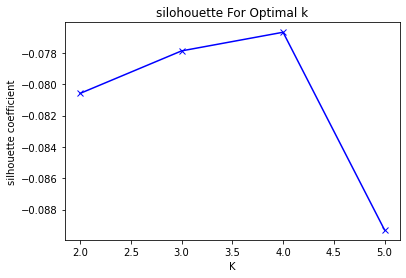

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


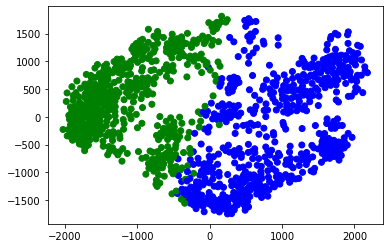

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


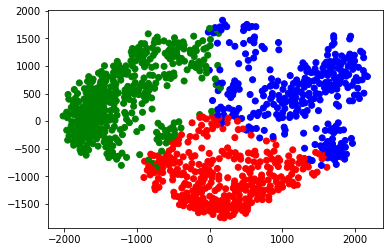

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


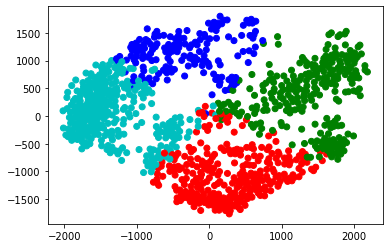

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


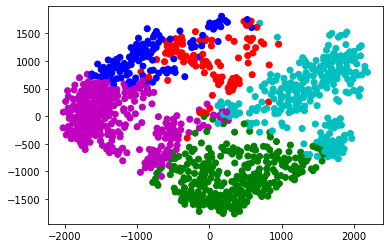

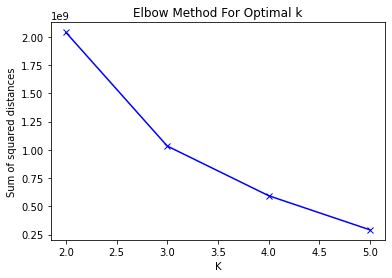

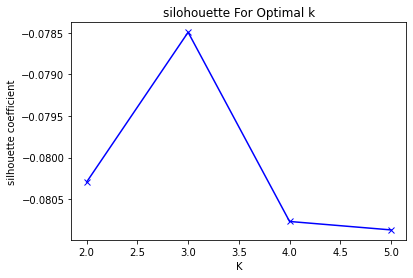

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


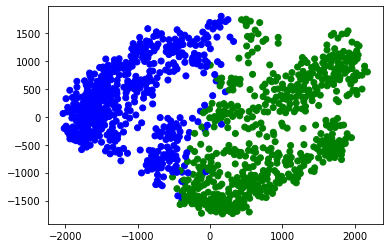

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


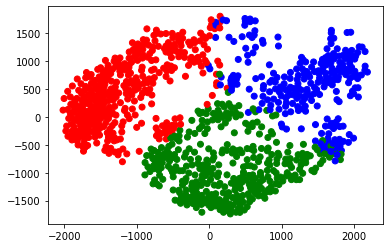

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


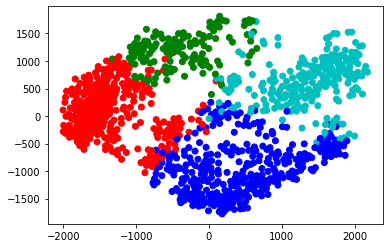

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


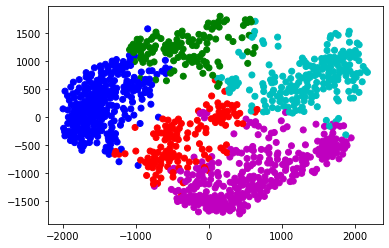

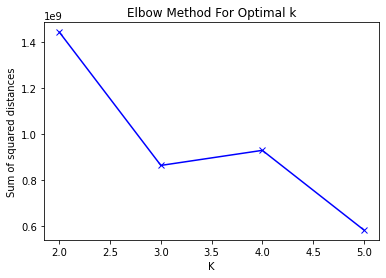

KeyboardInterrupt: ignored

In [27]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# you can performs your training on train/test dataset alone if there are computational issues
train_dash = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2])
train_dash = train_dash[:1000]
elbow(train_dash, "random", "euclid")
silhouette(train_dash, "random", "euclid")
elbow(train_dash, "forgy", "euclid")
silhouette(train_dash, "forgy", "euclid")
elbow(train_dash, "random", "manhattan")
silhouette(train_dash, "random", "manhattan")
elbow(train_dash, "forgy", "manhattan")
silhouette(train_dash, "forgy", "manhattan")

Hierarchical clustering

In [16]:
# implement hierarchical clustering ( you can use scikit module)
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering(k, data, linkage):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
    cluster.fit_predict(data)
    return cluster.labels_


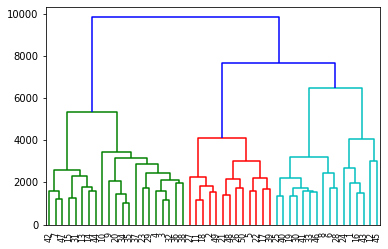

In [38]:
#visualize a dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
def dendogram(data):
    linked = linkage(data, 'ward')
    labelList = range(1, len(data)+1)
    dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending')
    plt.show()
tr = train_dash[:50]
dendogram(tr)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: In the dendrogram get the largest vertical difference between nodes, and in the middle draw an horizontal line. The number of vertical lines intersecting it is the optimal number of clusters.Here for the sample data we are getting 5.

Note: In the first section first 3 methods are only printed because of time taken for execution is so long.





/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


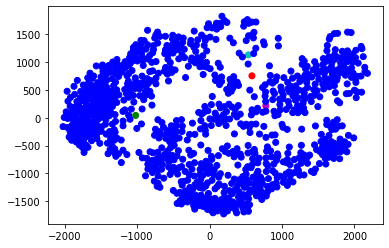

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


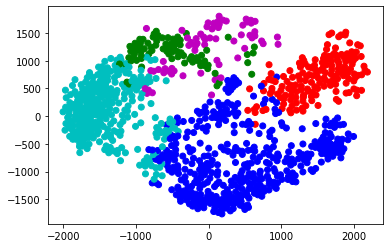

In [39]:
#visualisation of clusters using single linkage and complete linkage
labels = hierarchical_clustering(5, train_dash, 'single')
plotClusters(train_dash, labels)
labels = hierarchical_clustering(5, train_dash, 'complete')
plotClusters(train_dash, labels)


**Question:** Mention the differences observed using single and complete linkage:

Answer: Single linkage focuses on the minimum distance neighbours whereas complete linkage focuses on maximum distance neighbours between clusters, from the graphs we can see that complete linkage performing so much better than single as it is maximising distance between the clusters.